In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
cols = []
for column in customer_df.columns:
    cols.append(column.lower())
customer_df.columns = cols

In [ ]:
# customer_df.columns

In [5]:
customer_df.columns= customer_df.columns. str. replace(' ','_')

In [6]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], 
                                  dayfirst=True).dt.strftime('%m/%d/%Y')

In [7]:
customer_df['number_of_open_complaints'].value_counts()  # should be categorical

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [8]:
customer_df['number_of_open_complaints']= customer_df['number_of_open_complaints'].astype(str)

In [9]:
# "..if you don’t keep counting that value, then it is a discrete variable aka categorized variable" (https://hackernoon.com/continuous-vs-discrete-variables-in-the-context-of-machine-learning-15d9005e2525)
continuous_df = customer_df.select_dtypes(include = np.number)
discrete_df = customer_df.select_dtypes(include = object)

In [10]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,1,384.811147
1,6979.535903,0,94,13,42,8,1131.464935
2,12887.431650,48767,108,18,38,2,566.472247
3,7645.861827,0,106,18,65,7,529.881344
4,2813.692575,43836,73,12,44,1,138.130879
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,2,198.234764
9130,3096.511217,21604,79,14,28,1,379.200000
9131,8163.890428,0,85,9,37,2,790.784983
9132,7524.442436,21941,96,34,3,3,691.200000


In [11]:
discrete_df

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,02/24/2011,Employed,F,Suburban,Married,0,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,01/31/2011,Unemployed,F,Suburban,Single,0,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,02/19/2011,Employed,F,Suburban,Married,0,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,01/20/2011,Unemployed,M,Suburban,Married,0,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,03/02/2011,Employed,M,Rural,Single,0,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,10/02/2011,Employed,M,Urban,Married,0,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,12/02/2011,Employed,F,Suburban,Divorced,0,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,06/02/2011,Unemployed,M,Suburban,Single,3,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,03/02/2011,Employed,M,Suburban,Married,0,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [12]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

<AxesSubplot:>

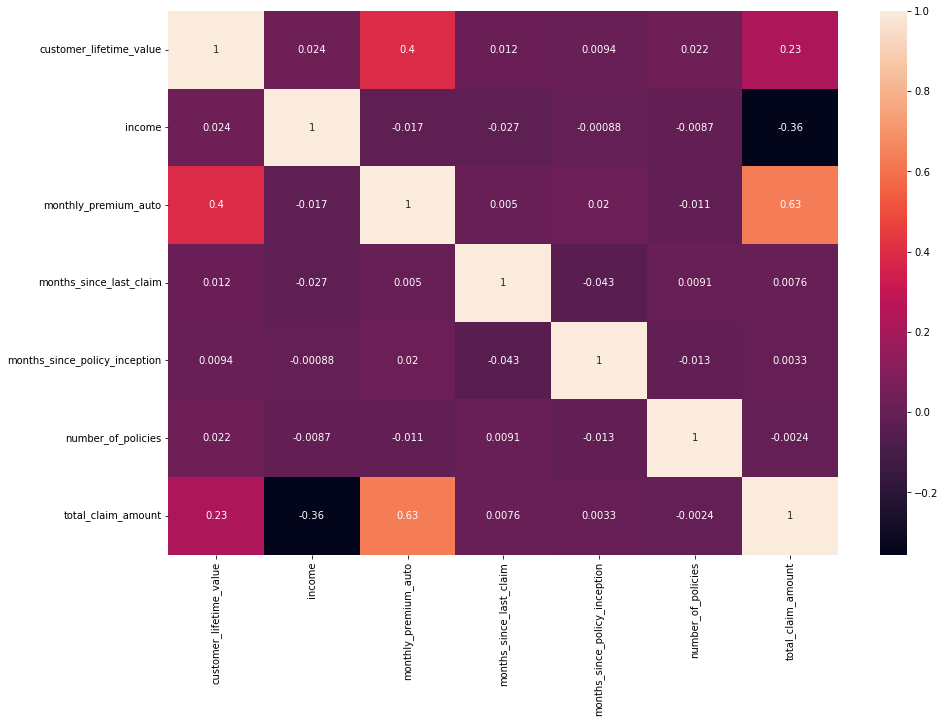

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(continuous_df.corr(), annot=True)

In [ ]:
### there is a pretty high correlation between 'total claim amount' and 'monthly premium auto'
### the second highest correlation is between 'monthly premium auto' and 'customer lifetime value'

In [14]:
continuous_df['income'].value_counts()  # a lot of 0.. i will try to predict what is the missing income value based on the other variables

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

<AxesSubplot:>

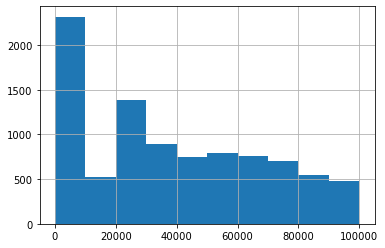

In [15]:
continuous_df['income'].hist()

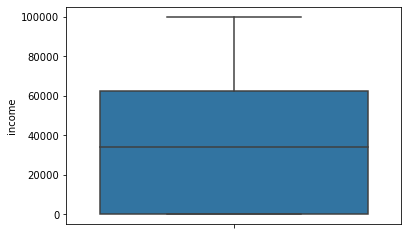

In [16]:
sns.boxplot(y=continuous_df['income'])
plt.show()

In [18]:
numericals_with_income = continuous_df.loc[continuous_df['income'] > 0]
numericals_with_income

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,1,384.811147
2,12887.431650,48767,108,18,38,2,566.472247
4,2813.692575,43836,73,12,44,1,138.130879
5,8256.297800,62902,69,14,94,2,159.383042
6,5380.898636,55350,67,0,13,9,321.600000
...,...,...,...,...,...,...,...
9127,5032.165498,66367,64,6,48,3,307.200000
9128,4100.398533,47761,104,16,58,1,541.282007
9129,23405.987980,71941,73,18,89,2,198.234764
9130,3096.511217,21604,79,14,28,1,379.200000


In [19]:
X_income = numericals_with_income.drop(['income','months_since_policy_inception'],axis=1)
y_income = numericals_with_income['income']

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
X_normalized_income = pd.DataFrame(MinMaxScaler().fit_transform(X_income), columns=X_income.columns)

In [21]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_normalized_income,y_income)
KNN.score(X_normalized_income,y_income)   # in 43% of the predictions we will be right

0.4339152119700748

In [22]:
X_all = continuous_df.drop(['income','months_since_policy_inception'],axis=1)
X_normalized_all = pd.DataFrame(MinMaxScaler().fit_transform(X_all), columns=X_all.columns)
y_all = continuous_df['income']

In [23]:
predicted_income = pd.Series(KNN.predict(X_normalized_all),name='predicted_income') 

In [24]:
predicted_income.value_counts(dropna=False)  

95697    16
17950    15
19121    15
20978    15
12843    14
         ..
21724     1
61725     1
68507     1
64669     1
28360     1
Name: predicted_income, Length: 2867, dtype: int64

In [25]:
customer_df = pd.concat([customer_df,predicted_income],axis=1)

In [26]:
customer_df['final_income'] =  np.where(customer_df['income']== 0, customer_df['predicted_income'], customer_df['income'])

In [27]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,predicted_income,final_income
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,02/24/2011,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,56274,56274
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,01/31/2011,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,13908,13908
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,02/19/2011,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,25074,48767
3,WW63253,California,7645.861827,No,Basic,Bachelor,01/20/2011,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,24982,24982
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,03/02/2011,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,33462,43836


In [28]:
display(customer_df['final_income'].mean())
display(customer_df['income'].mean())

44804.79866433107

37657.38000875848

<AxesSubplot:>

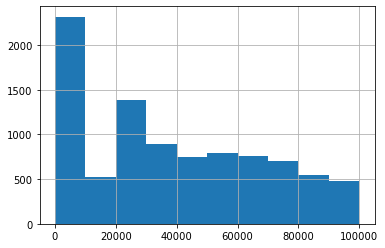

In [29]:
customer_df['income'].hist()

<AxesSubplot:>

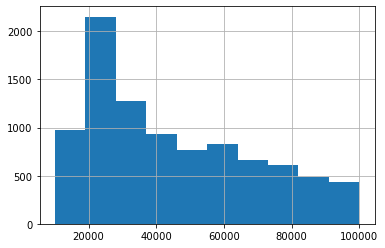

In [30]:
customer_df['final_income'].hist()

In [31]:
customer_df.drop(['income','predicted_income'],axis=1,inplace=True) #droping the columns we dont need of the income with missing values and not fully corecct income
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,final_income
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,02/24/2011,Employed,F,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,56274
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,01/31/2011,Unemployed,F,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,13908
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,02/19/2011,Employed,F,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,48767
3,WW63253,California,7645.861827,No,Basic,Bachelor,01/20/2011,Unemployed,M,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,24982
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,03/02/2011,Employed,M,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,43836


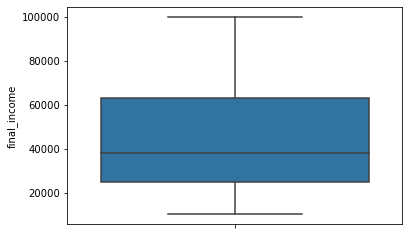

In [32]:
sns.boxplot(y=customer_df['final_income'])
plt.show()


In [33]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
final_income                     0
dtype: int64

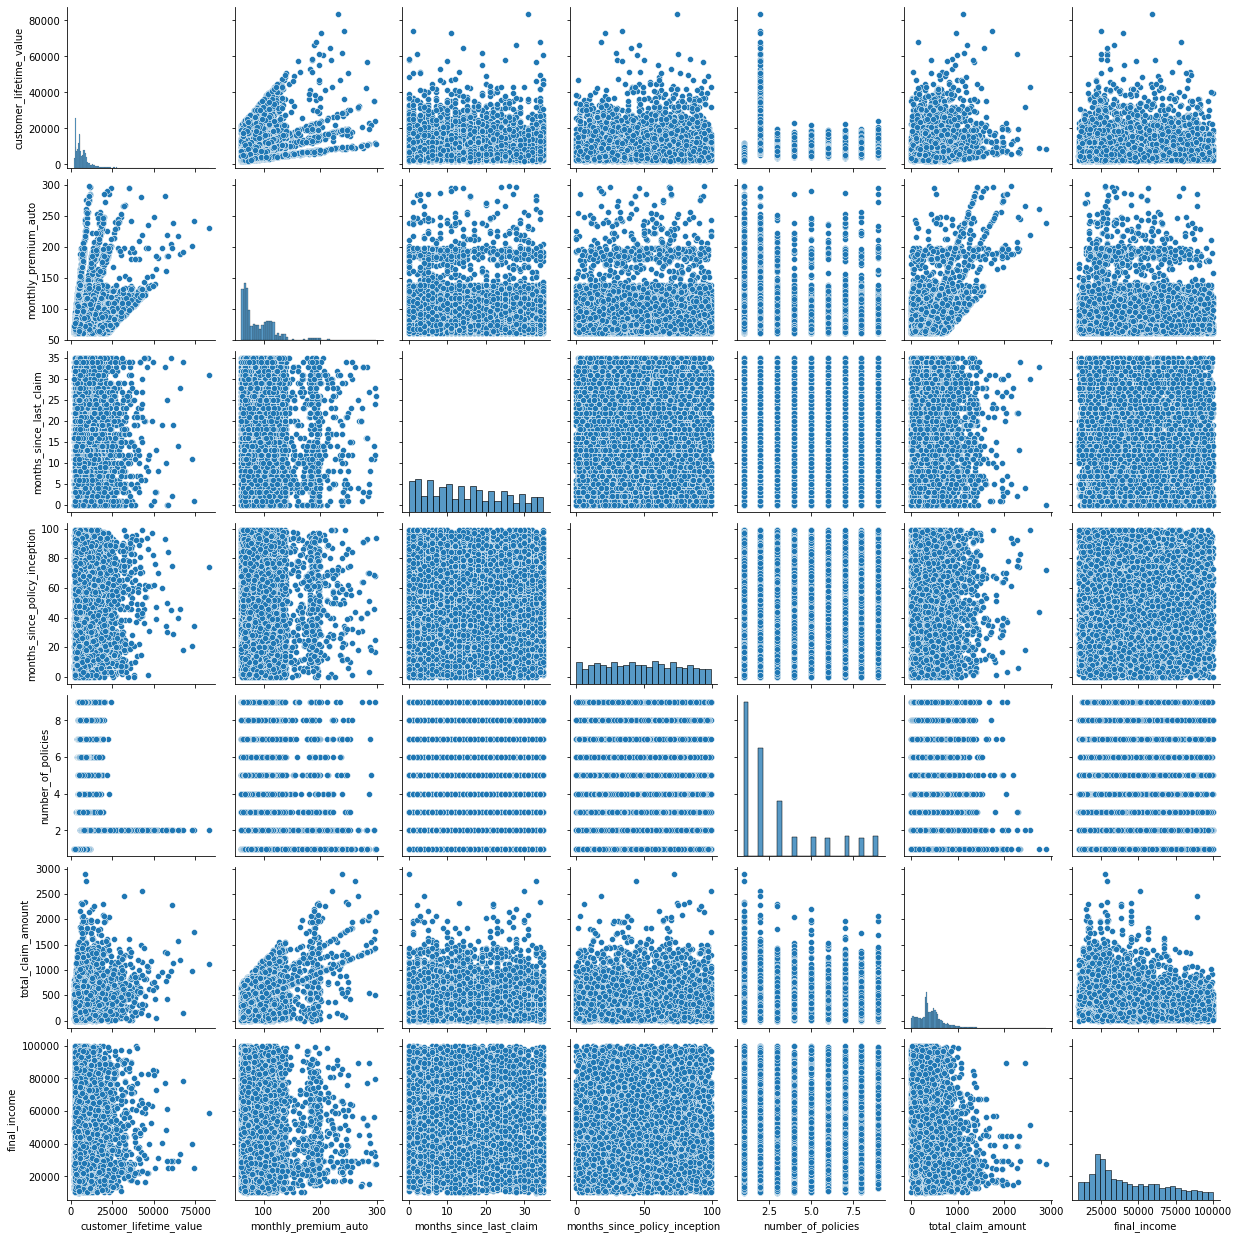

In [34]:
sns.pairplot(customer_df)
plt.show()